## Deep-learning을 통한 mnist 읽기 
#### 각 pixel이 255이 최대라 0~1사이의 값으로 조정  

In [15]:
import tensorflow as tf 

mnist = tf.keras.datasets.mnist 

(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train, X_test = X_train / 255.0, X_test / 255.0 

### One-hot-encoding 
#### loss 함수를 sparse_categorical_crossentropy 로 설정시 같은 효과 

In [16]:
# model을 만들어 보자면,,,
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28)),
    tf.keras.layers.Dense(1000, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(  
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model.summary()

/home/moon/venv/eda_venv/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_4 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1000)           │       785,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │        10,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 795,010 (3.03 MB)

 Trainable params: 795,010 (3.03 MB)

 Non-trainable params: 0 (0.00 B)

In [17]:
# 학습을 해보자 
import time 

start_time = time.time()
# 10번 반복해서 학습, 100개씩 나눠서 처리 -> 1번 끝까지 학습하려면 100개씩 10번 반복해야 1000 
# 결론은 10x10 총 100번 학습 
hist = model.fit(X_train, y_train, validation_data=(X_test, y_test),
                 epochs = 10, batch_size=100, verbose = 1) 


Epoch 1/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8897 - loss: 0.3865 - val_accuracy: 0.9680 - val_loss: 0.1069
Epoch 2/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9728 - loss: 0.0910 - val_accuracy: 0.9718 - val_loss: 0.0872
Epoch 3/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9835 - loss: 0.0532 - val_accuracy: 0.9794 - val_loss: 0.0656
Epoch 4/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9898 - loss: 0.0354 - val_accuracy: 0.9775 - val_loss: 0.0699
Epoch 5/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9932 - loss: 0.0234 - val_accuracy: 0.9806 - val_loss: 0.0626
Epoch 6/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9946 - loss: 0.0177 - val_accuracy: 0.9808 - val_loss: 0.0631
Epoch 7/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9957 - loss: 0.0143 - val_accuracy: 0.9822 - val_loss: 0.0646
Epoch 8/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9964 - loss: 0.0111 - val_accuracy: 0.

In [18]:
print ("Fit time(학습시간) : ", time.time( )- start_time)

Fit time(학습시간) :  47.37818717956543


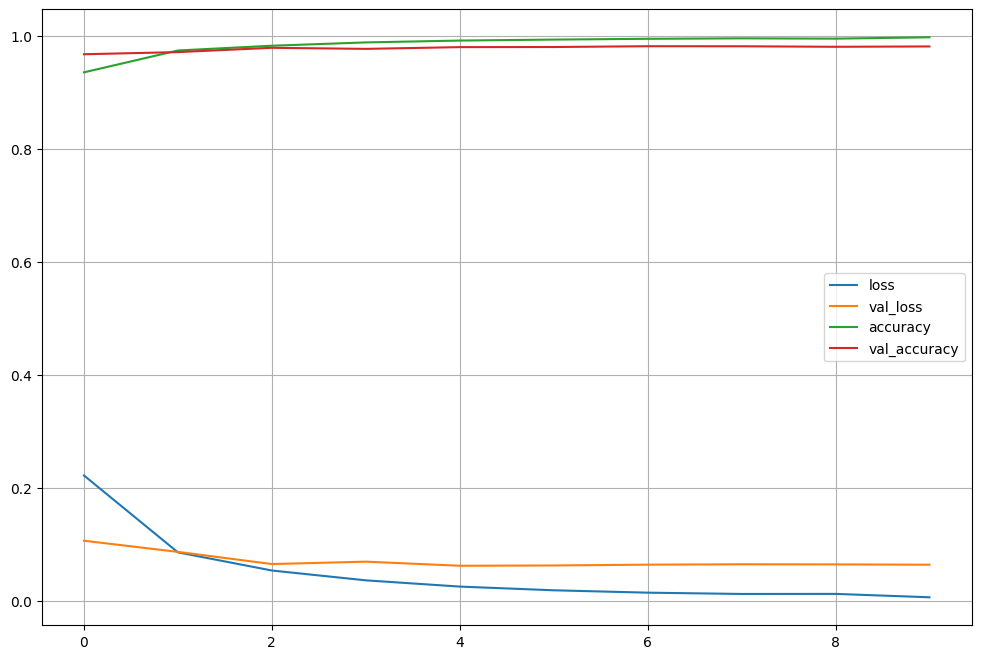

In [ ]:
import matplotlib.pyplot as plt 
%matplotlib inline 

plot_target = ['loss', 'val_loss', 'accuracy', 'val_accuracy']
plt.figure(figsize=(12, 8))
for each in plot_target:
    plt.plot(hist.history[each], label=each)
plt.legend()
plt.grid()
plt.show()

## machine learning 대비 약 5% 향상 

In [20]:
score = model.evaluate(X_test, y_test)
print('Test loss: ', score[0])
print('Test accuracy: ', score[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9787 - loss: 0.0771
Test loss:  0.06445470452308655
Test accuracy:  0.9818000197410583


### 나머지 약 2%의 오차가 무엇이 있는지 확인 

In [21]:
import numpy as np 

predicted_result = model.predict(X_test)
predicted_labels = np.argmax(predicted_result, axis=1)
predicted_labels[:10]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 920us/step


array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9])

### 틀린 index만 모아서 

In [22]:
wrong_result = []

for n in range (0, len(y_test)):
    if predicted_labels[n] != y_test[n]:
        wrong_result.append(n)
len(wrong_result)

182

#### 16개만 보자 보자 ~

In [24]:
import random 

samples = random.choices(population=wrong_result, k=16)
samples

[3567,
 3985,
 1232,
 3818,
 9634,
 9792,
 1232,
 5936,
 3388,
 8522,
 956,
 3567,
 2648,
 4497,
 1621,
 3893]

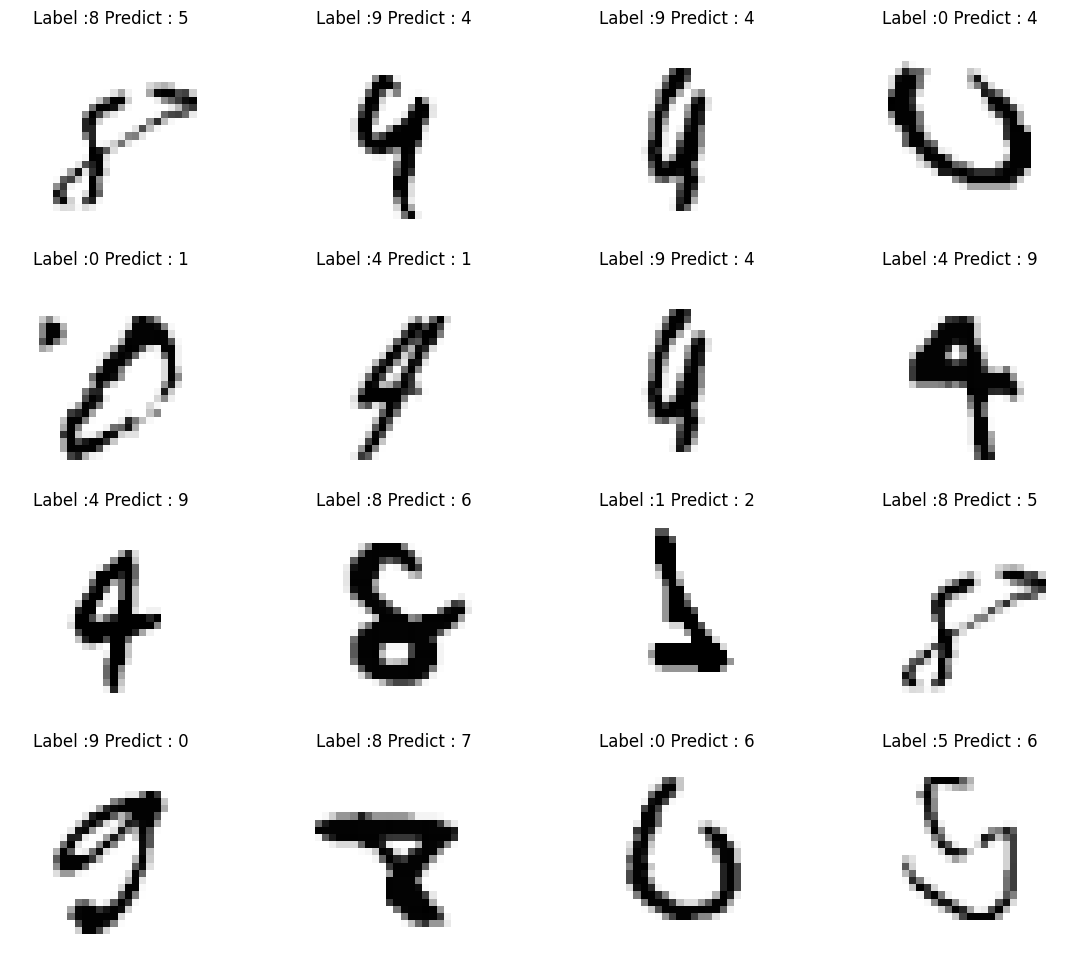

In [25]:
plt.figure(figsize=(14,12))

for idx, n in enumerate(samples):
    plt.subplot(4, 4, idx+1)
    plt.imshow(X_test[n].reshape(28,28), cmap='Greys', interpolation='nearest')
    plt.title('Label :' + str(y_test[n]) + ' Predict : ' + str(predicted_labels[n]))
    plt.axis('off')

plt.show()